In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
exproot = r"N:\PonceLab\Users\Alireza\insilico_experiments\papulation_size_effect\results\result_popsize_vs_distance"

In [ ]:
target_gen_img_distance_df = pd.read_csv(os.path.join(exproot, f"target_gen_img_distance_df.cvs"))
target_gen_img_distance_df.head()

In [ ]:
score_df = pd.read_csv(os.path.join(exproot, f"objective_score_df.cvs"))
score_df.head()

In [ ]:
##date_time_str = '2023-04-28_10-47'
#exproot_add = r"C:\Data\cosine\insilico_experiments\papulation_size_effect\results\result_real_%s" % date_time_str


In [ ]:
#target_gen_img_distance_df_add = pd.read_csv(os.path.join(exproot_add, f"target_gen_img_distance_df.cvs"))
#target_gen_img_distance_df_add.head()    

In [ ]:
#target_gen_img_distance_df = pd.concat(
#                    [target_gen_img_distance_df, target_gen_img_distance_df_add], ignore_index=True)

In [ ]:
result_df = target_gen_img_distance_df.groupby(["score_method", "population_size"])["target_gen_img_distance"].mean()
result_df.head()

In [ ]:
result_unstack_df = result_df.unstack(level=1) 
result_unstack_df

In [ ]:
score_df.groupby(["score_method", "population_size"])["objective_score"].mean().unstack(level=1)

In [ ]:
score_df.groupby(["score_method"])["objective_score"].mean()

In [ ]:
# Z-score each score method
score_df_mean_zscore = (score_df.groupby(["score_method", "population_size"])["objective_score"].mean() - \
    score_df.groupby(["score_method"])["objective_score"].mean()) / score_df.groupby(["score_method"])["objective_score"].std()
score_df_mean_zscore_unstack = score_df_mean_zscore.unstack(level=1)
score_df_mean_zscore_unstack

In [ ]:
dist_mth_name = ["Correlation", "Manhattan(L1)", "Euclidean(MSE)", "Spearman", "Cosine", "Dot"]
fig, ax = plt.subplots(figsize=(6,6))
z_min = 0;
z_max = 1;
c = ax.pcolor(result_unstack_df.astype(float),
              cmap='YlGnBu', linewidth=4) #, vmin=z_min, vmax=z_max,
cb = fig.colorbar(c, ax=ax, fraction=0.04, pad=0.04)
cb.set_label('L2 pixel distance of target - evolve images')
ax.set_xlabel('Population size', fontsize = 20)
#ax.set_ylabel('methood', fontsize = 18)
ax.set_title('Population size effect \n'+
             'recording from Alexnet Conv5 \n'+
             'images have been evolved by fc6 GAN', fontsize = 15)
ax.set_xticks(np.arange(.5, result_unstack_df.shape[1], 1),
             [f"{i}" for i in result_unstack_df.columns],
             rotation=45, fontsize = 15)

#ax.set_yticks(np.arange(.5, result_unstack_df.shape[0], 1),
#             result_unstack_df.index,
#             rotation=45, fontsize = 15)
ax.set_yticks(np.arange(.5, result_unstack_df.shape[0], 1),
             dist_mth_name,
             rotation=45, fontsize = 15)
[bl.set_linewidth(1.5) for bl in ax.spines.values()]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(exproot + "\\Population_size_effect_silicoexp.png", bbox_inches='tight')

In [ ]:
dist_mth_name = ["Correlation", "Manhattan(L1)", "Euclidean(MSE)", "Spearman", "Cosine", "Dot"]
fig, ax = plt.subplots(figsize=(6,6))
z_min = 0;
z_max = 1;
c = ax.pcolor(score_df_mean_zscore_unstack.astype(float),
              cmap='jet', linewidth=4) #, vmin=z_min, vmax=z_max,
cb = fig.colorbar(c, ax=ax, fraction=0.04, pad=0.04)
cb.set_label('obcective score (Z-scored)')
ax.set_xlabel('Population size', fontsize = 20)
#ax.set_ylabel('methood', fontsize = 18)
ax.set_title('Objective score Vs. Population size \n'+
             'recording from Alexnet Conv5 \n'+
             'images have been evolved by fc6 GAN', fontsize = 15)
ax.set_xticks(np.arange(.5, result_unstack_df.shape[1], 1),
             [f"{i}" for i in result_unstack_df.columns],
             rotation=45, fontsize = 15)

#ax.set_yticks(np.arange(.5, result_unstack_df.shape[0], 1),
#             result_unstack_df.index,
#             rotation=45, fontsize = 15)
ax.set_yticks(np.arange(.5, result_unstack_df.shape[0], 1),
             dist_mth_name,
             rotation=45, fontsize = 15)
[bl.set_linewidth(1.5) for bl in ax.spines.values()]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(exproot + "\\Population_size_effect_silicoexp_objective_score.png", bbox_inches='tight')

In [6]:
# print LPISP score with devloped ImageSimilarity class
import sys
sys.path.append(r"C:\Users\Alireza\Documents\Git\image-similarity")
from utils.ImageSimilarity import ImageSimilarity as IS

In [3]:
# generated image were saved in the following order: population size (popsise{number}), image name (rec_{name}), distance metric (method_{name}) and last_gen_mean_*.jpg. 
# In the following code I will read all the images and save them in a totch tensor, in this format: [distans metric, population size, bach size, image]
# Also I will read the targer images and save them in a tensor in the same format

import glob
from PIL import Image
from torchvision.transforms import ToTensor, Resize, Compose, ToPILImage
import torch
import os


num_popsize = 7
num_dist_mth = 6
num_img = 10
img_size = (227, 227)
preprocess=Compose([Resize(img_size), ToTensor()])
#difine the the tensor that will hold the images
images = torch.zeros((num_dist_mth, num_popsize, num_img, 3, img_size[0], img_size[1]))
target_images = torch.zeros((num_img, 3, img_size[0], img_size[1]))

# define the root directory
dir_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\papulation_size_effect\results\result_popsize_vs_distance"
# define the list of the population sizes, distance metrics and iamge names
image_name_list = list()
popsize_list = list()
dist_mth_list = list()
image_prifix = "lastgen_mean_masked"
# read the images and save them in the tensor
for popsize in os.listdir(dir_root):
    popsize_dir = os.path.join(dir_root, popsize)
    if os.path.isdir(popsize_dir):
        print(f"Processing {popsize}...")
        popsize_list.append(popsize)
        for img_name_foler in os.listdir(popsize_dir):
            img_name_foler_dir = os.path.join(popsize_dir, img_name_foler)
            if os.path.isdir(img_name_foler_dir):
                print(f"  Processing {img_name_foler}...")
                # add the image name to the list if it is not there
                if img_name_foler not in image_name_list:
                     image_name_list.append(img_name_foler)
                # read the target image
                target_img_path = glob.glob(os.path.join(img_name_foler_dir, "targetimg_RF_masked.png"))
                if len(target_img_path) == 1:
                    img = Image.open(target_img_path[0])
                    img = preprocess(img)
                    target_images[image_name_list.index(img_name_foler), :, :, :] = img
                else:
                    raise Exception(f"    Error: no more than one target image found in {img_name_foler_dir}")
                for dist_mth in os.listdir(img_name_foler_dir):
                    dist_mth_dir = os.path.join(img_name_foler_dir, dist_mth)
                    if os.path.isdir(dist_mth_dir):
                        print(f"    Processing {dist_mth}...")
                        # add the distance metric to the list if it is not there
                        if dist_mth not in dist_mth_list:
                            dist_mth_list.append(dist_mth)
                        img_path = glob.glob(os.path.join(dist_mth_dir, image_prifix + "*.jpg"))
                        if len(img_path) == 1:
                            img = Image.open(img_path[0])
                            img = preprocess(img)
                            images[dist_mth_list.index(dist_mth), popsize_list.index(popsize), image_name_list.index(img_name_foler), :, :, :] = img
                        else:
                            raise Exception(f"      Error: no more than one image found in {dist_mth_dir}")
                    else:
                        print(f"      warning: {dist_mth_dir} is not a directory")
            else:
                print(f"  warning: {img_name_foler_dir} is not a directory")
                
    else:
        print(f"warning: {popsize_dir} is not a directory")

Processing popsize-1...
  Processing rec_n02085374_10774...
    Processing method_Correlation...
    Processing method_cosine...
    Processing method_dot...
    Processing method_L1...
    Processing method_MSE...
    Processing method_Spearman...
  Processing rec_n02389559_21065...
    Processing method_Correlation...
    Processing method_cosine...
    Processing method_dot...
    Processing method_L1...
    Processing method_MSE...
    Processing method_Spearman...
  Processing rec_n02403740_12690...
    Processing method_Correlation...
    Processing method_cosine...
    Processing method_dot...
    Processing method_L1...
    Processing method_MSE...
    Processing method_Spearman...
  Processing rec_n03028596_1522...
    Processing method_Correlation...
    Processing method_cosine...
    Processing method_dot...
    Processing method_L1...
    Processing method_MSE...
    Processing method_Spearman...
  Processing rec_n03368352_34835...
    Processing method_Correlation...
    

In [4]:
popsize_dict = dict()
for i, popsize in enumerate(popsize_list):
    popsize_dict[popsize] = i
dist_mth_dict = dict()
for i, dist_mth in enumerate(dist_mth_list):
    dist_mth_dict[dist_mth] = i
##
ref_img = target_images
tar_img = images[dist_mth_dict["method_cosine"], :, :, :, :, :]
# convert tar_img from (num_popsize, num_img, 3, W, H) to (unm_img, num_popsize, 3, W, H)
tar_img = tar_img.permute(1, 0, 2, 3, 4) 

print("img_ref shape: ", ref_img.shape)
print("img_tar shape: ", tar_img.shape)

img_ref shape:  torch.Size([10, 3, 227, 227])
img_tar shape:  torch.Size([10, 7, 3, 227, 227])


In [7]:
from utils.ImageSimilarity import ImageSimilarity as IS
is_obj = IS(ref_img, tar_img)
is_obj.test()
lpips_value = is_obj.LPIPS(net='alex')

Sallm
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\lpips\weights\v0.1\alex.pth


In [12]:
# have pandas data frame in size of (num_metric, num_popsize) and fill it with the lpips mean across all images
import pandas as pd
from utils.ImageSimilarity import ImageSimilarity as IS


lpips_df = pd.DataFrame(index=dist_mth_list, columns=popsize_list)

for dist_mth in dist_mth_list:
    ref_img = target_images
    tar_img = images[dist_mth_dict[dist_mth], :, :, :, :, :]
    # convert tar_img from (num_popsize, num_img, 3, W, H) to (unm_img, num_popsize, 3, W, H)
    tar_img = tar_img.permute(1, 0, 2, 3, 4) 
    is_obj = IS(ref_img, tar_img)
    lpips_value = is_obj.LPIPS(net='alex')
    lpips_df.loc[dist_mth, :] =lpips_value.mean(axis=0)
    # plot the lpips values for each population size with mean and std across all images set title as the distance metric name and save the figure
    plt.figure()
    plt.title(dist_mth)
    plt.errorbar(x=popsize_list, y=lpips_value.mean(axis=0), yerr=lpips_value.std(axis=0), label=dist_mth)
    # rotate the xticks
    plt.xticks(rotation=45)
    # set tight layout and y limit
    plt.tight_layout()
    plt.ylim([.15, 0.3])
    # save the figure
    plt.savefig(os.path.join(dir_root, f"lpips_{dist_mth}.png"))
    plt.close()



Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\lpips\weights\v0.1\alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\lpips\weights\v0.1\alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\lpips\weights\v0.1\alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\lpips\weights\v0.1\alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: c:\Users\Alireza\miniconda3\envs\cosine-project\lib\site-packages\lpips\weights\v0.1\alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: c:\Users\Alireza\miniconda3\envs\cosine-project\li

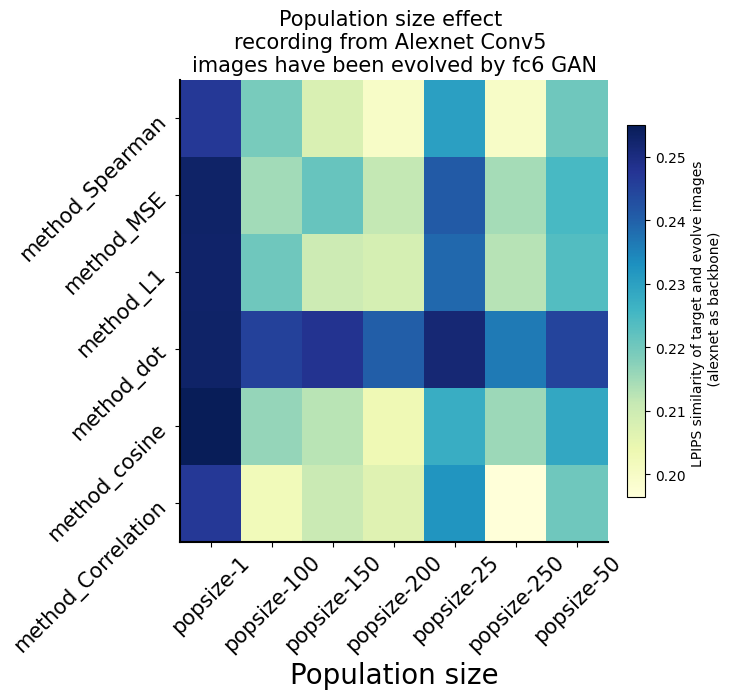

In [9]:
dist_mth_name = dist_mth_list #["Correlation", "Manhattan(L1)", "Euclidean(MSE)", "Spearman", "Cosine", "Dot"]
fig, ax = plt.subplots(figsize=(6,6))
z_min = 0
z_max = 1
c = ax.pcolor(lpips_df.astype(float),
              cmap='YlGnBu', linewidth=4) #, vmin=z_min, vmax=z_max,
cb = fig.colorbar(c, ax=ax, fraction=0.04, pad=0.04)
cb.set_label('LPIPS similarity of target and evolve images \n (alexnet as backbone)')
ax.set_xlabel('Population size', fontsize = 20)
#ax.set_ylabel('methood', fontsize = 18)
ax.set_title('Population size effect \n'+
             'recording from Alexnet Conv5 \n'+
             'images have been evolved by fc6 GAN', fontsize = 15)
ax.set_xticks(np.arange(.5, lpips_df.shape[1], 1),
             [f"{i}" for i in lpips_df.columns],
             rotation=45, fontsize = 15)

#ax.set_yticks(np.arange(.5, result_unstack_df.shape[0], 1),
#             result_unstack_df.index,
#             rotation=45, fontsize = 15)
ax.set_yticks(np.arange(.5, lpips_df.shape[0], 1),
             dist_mth_name,
             rotation=45, fontsize = 15)
[bl.set_linewidth(1.5) for bl in ax.spines.values()]
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(exproot +"\\Population_size_effect_silicoexp_lpips.png", bbox_inches='tight')

In [ ]:
import lpips

loss_fn = lpips.LPIPS(net="alex",version=0.1)
im0 = ref_img[1,:,:,:].unsqueeze(0)
im1 = tar_img[1,6,:,:].unsqueeze(0)
# convert image to the [0, 255] 
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(ToPILImage()(im0[0,:,:,:]))
plt.subplot(1, 2, 2)
plt.imshow(ToPILImage()(im1[0,:,:,:]))

#print input shapes
#print("im0 shape: ", im0.shape)
#print("im1 shape: ", im1.shape)

d = loss_fn.forward(im0,im0)
print("d value: ", d)

In [ ]:
lpips_value